In [1]:
pip install yfinance matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed
/var/folders/9z/tc3y_17n39v73g18z3wq5gzc0000gn/T/ipykernel_29499/513922384.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Signal'][20:] = [1 if data['Short_MA'][i] > data['Long_MA'][i] else 0 for i in range(20, len(data))] # Buy signal
/var/folders/9z/tc3y_17n39v73g18z3wq5gzc0000gn/T/ipykernel_29499/513922384.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = [1 if data['Short_MA'][i] > data['Long_MA'][i] else 0 for i in range(20, len(data))] # Buy signal


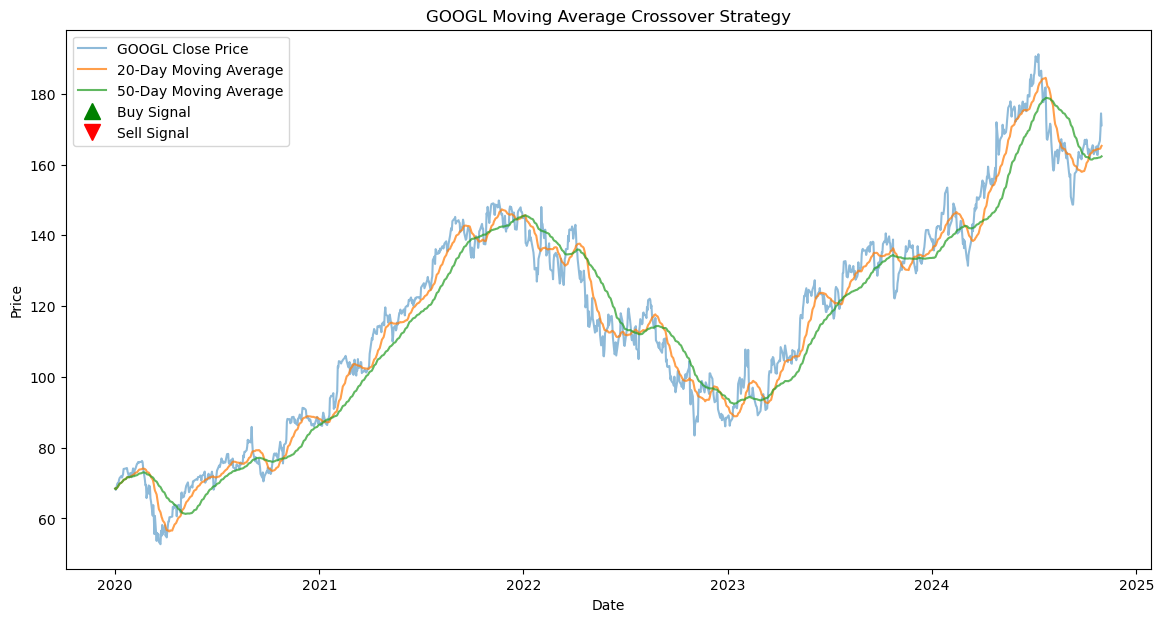

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch historical data for a stock (e.g., Apple Inc.)
ticker = 'GOOGL'
data = yf.download(ticker, start='2020-01-01', end='2024-11-01')

# Step 2: Calculate Short-Term and Long-Term Moving Averages
data['Short_MA'] = data['Close'].rolling(window=20, min_periods=1).mean()  # 20-day moving average
data['Long_MA'] = data['Close'].rolling(window=50, min_periods=1).mean()   # 50-day moving average

# Step 3: Implement Buy/Sell Signals
data['Signal'] = 0  # Initialize the Signal column
data['Signal'][20:] = [1 if data['Short_MA'][i] > data['Long_MA'][i] else 0 for i in range(20, len(data))] # Buy signal
data['Position'] = data['Signal'].diff()  # 1 indicates buy, -1 indicates sell

# Step 4: Plot the Data with Buy/Sell Signals
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label=f'{ticker} Close Price', alpha=0.5)
plt.plot(data['Short_MA'], label='20-Day Moving Average', alpha=0.75)
plt.plot(data['Long_MA'], label='50-Day Moving Average', alpha=0.75)

# Plot Buy Signals
plt.plot(data[data['Position'] == 1].index, data['Short_MA'][data['Position'] == 1], 
         '^', markersize=12, color='g', label='Buy Signal')

# Plot Sell Signals
plt.plot(data[data['Position'] == -1].index, data['Short_MA'][data['Position'] == -1], 
         'v', markersize=12, color='r', label='Sell Signal')

plt.title(f"{ticker} Moving Average Crossover Strategy")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()